In [3]:
import pandas as pd
try:
    df = pd.read_excel('Crime.csv')
except:
    import xlwings as xw
    df = xw.Book('Crime.csv')
    df = df.sheets(1).used_range.options(pd.DataFrame, index = False).value
    

In [4]:
import missingno as msno
import plotly.express as px
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime

In [5]:
df

Incident ID Offence Code    CR Number    Dispatch Date / Time  \
0       201223224.0       2303.0  190002520.0  01/16/2019 03:51:46 PM   
1       201224613.0       2006.0  190004310.0  01/27/2019 06:05:56 PM   
2       201267200.0       1103.0  190057412.0  11/28/2019 06:08:02 AM   
3       201230900.0       1399.0  190011960.0  03/15/2019 10:53:22 AM   
4       201265312.0       1399.0  190055150.0  11/15/2019 03:31:20 PM   
...             ...          ...          ...                     ...   
225685  201248696.0       4104.0  190034187.0  07/18/2019 06:48:53 PM   
225686  201250353.0       2902.0  190036349.0  07/30/2019 04:39:04 PM   
225687  201250255.0       2305.0  190035784.0  07/27/2019 01:20:11 PM   
225688  201243750.0       2203.0  190028212.0  06/13/2019 10:33:01 AM   
225689  201244611.0       2309.0  190029400.0  06/19/2019 08:22:39 PM   

       NIBRS Code  Victims             Crime Name1  \
0             23C      1.0  Crime Against Property   
1           200.0      1.0  Crime Against Property   
2             11A      1.0    Crime Against Person   
3             13B      2.0    Crime Against Person   
4             13B      1.0    Crime Against Person   
...           ...      ...                     ...   
225685        90G      1.0   Crime Against Society   
225686      290.0      1.0  Crime Against Property   
225687        23F      1.0  Crime Against Property   
225688      220.0      1.0  Crime Against Property   
225689        23H      1.0  Crime Against Property   

                                     Crime Name2  \
0                                    Shoplifting   
1                                          Arson   
2                                  Forcible Rape   
3                                 Simple Assault   
4                                 Simple Assault   
...                                          ...   
225685                     Liquor Law Violations   
225686  Destruction/Damage/Vandalism of Property   
225687                  Theft From Motor Vehicle   
225688            Burglary/Breaking and Entering   
225689                         All other Larceny   

                                   Crime Name3 Police District Name  ...  \
0                        LARCENY - SHOPLIFTING              WHEATON  ...   
1                          ARSON - RESIDENTIAL   MONTGOMERY VILLAGE  ...   
2                            RAPE - STRONG-ARM              WHEATON  ...   
3                         ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
4                         ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE  ...   
...                                        ...                  ...  ...   
225685                        LIQUOR - POSSESS            ROCKVILLE  ...   
225686               DAMAGE PROPERTY - PRIVATE            ROCKVILLE  ...   
225687                     LARCENY - FROM AUTO              WHEATON  ...   
225688  BURGLARY - FORCED ENTRY-NONRESIDENTIAL        SILVER SPRING  ...   
225689                    LARCENY - FROM YARDS        SILVER SPRING  ...   

       Street Prefix     Street Name Street Suffix  Street Type  \
0               None      VEIRS MILL          None           RD   
1               None          GIRARD          None           ST   
2               None         GEORGIA          None          AVE   
3               None  QUINCE ORCHARD          None          BLV   
4               None       MIDCOUNTY          None          HWY   
...              ...             ...           ...          ...   
225685          None     MEADOW HALL          None           DR   
225686          None   CRABBS BRANCH          None          WAY   
225687          None         BENTLEY          None           LA   
225688          None           SLIGO          None          AVE   
225689          None       REGALWOOD          None          TER   

               Start_Date_Time           End_Date_Time   Latitude  Longitude  \
0       01/16/2019 03:51:00 PM                    None  39.

In [6]:
df.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       68799
NIBRS Code                     0
Victims                        0
Crime Name1                  141
Crime Name2                  141
Crime Name3                  141
Police District Name           0
Block Address              20502
City                        1057
State                          0
Zip Code                    3187
Agency                         0
Place                          0
Sector                        59
Beat                          61
PRA                           41
Address Number             20428
Street Prefix             215741
Street Name                    0
Street Suffix             221447
Street Type                  314
Start_Date_Time                0
End_Date_Time             116652
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

<AxesSubplot:>

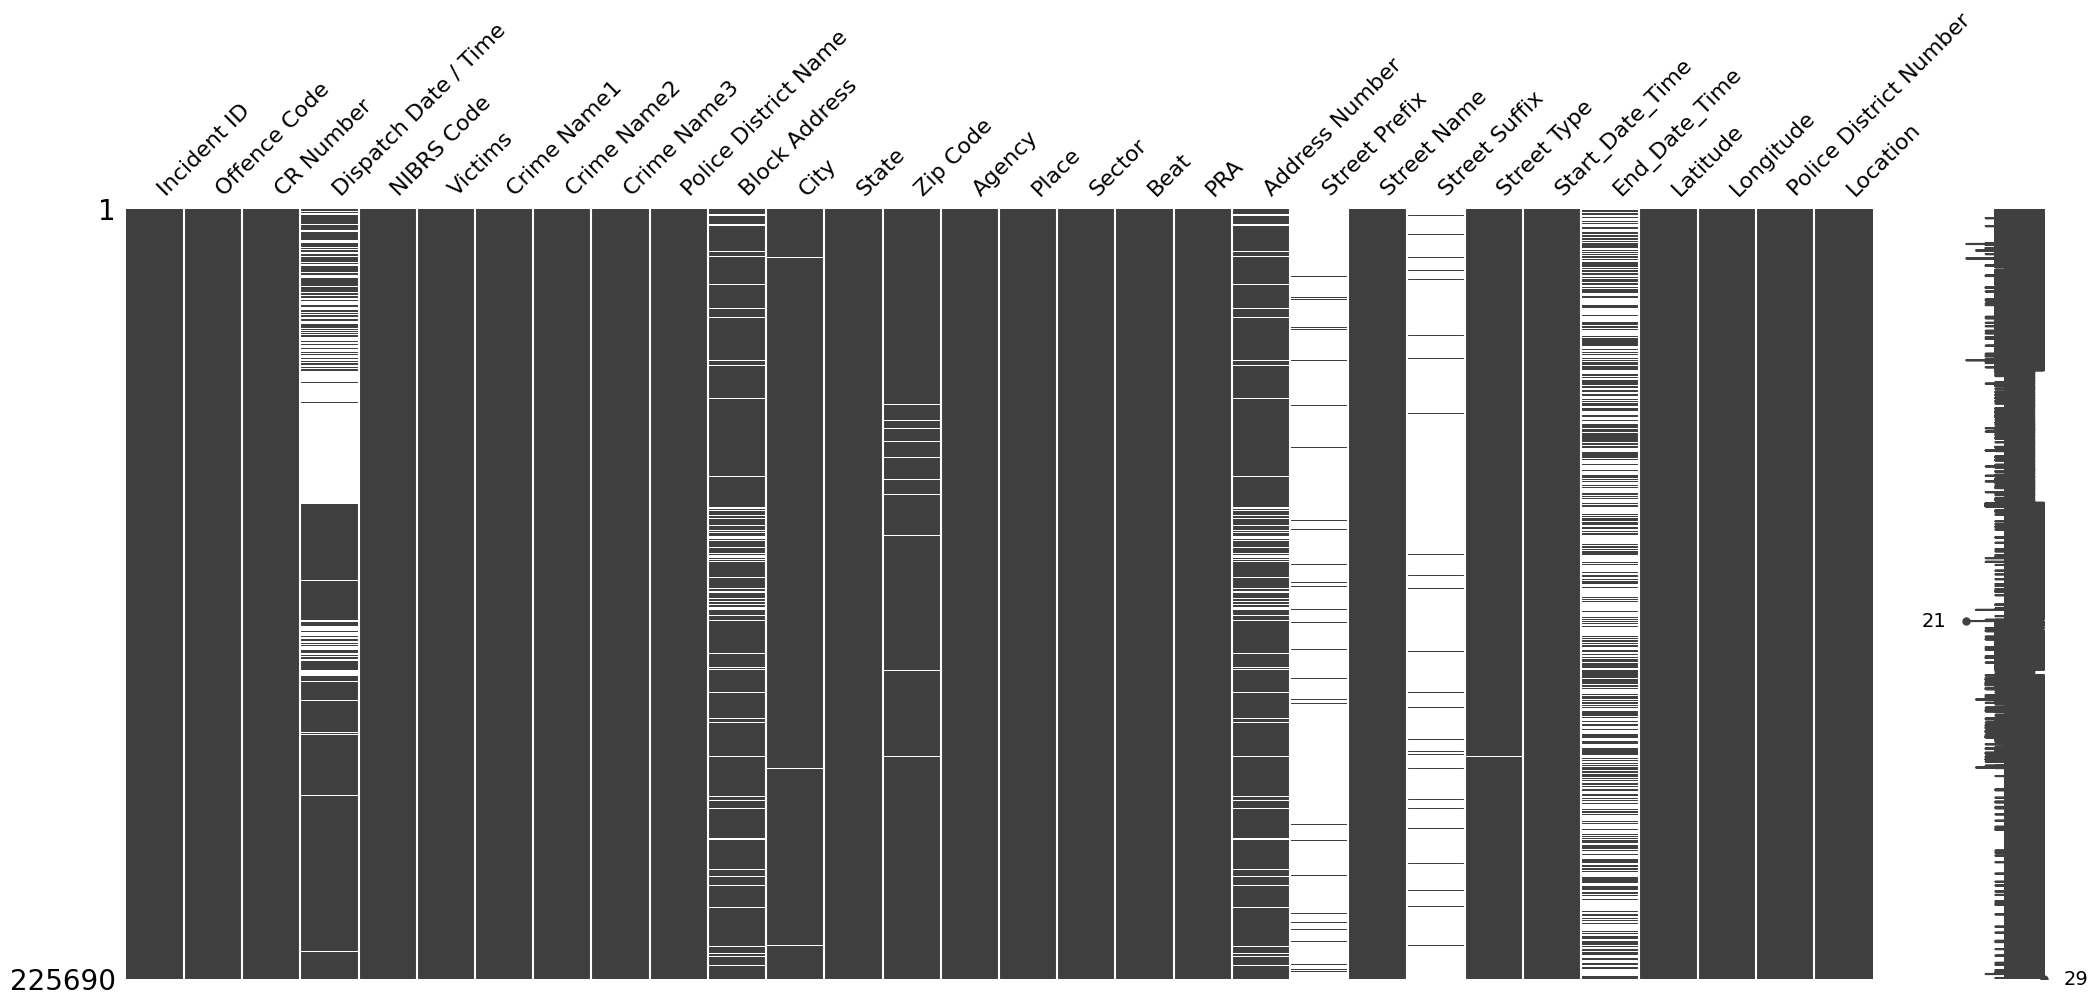

In [7]:
# 결측치 시각화
msno.matrix(df)

In [8]:
#결측치 많은 컬럼 제거
df.drop(['Dispatch Date / Time', 'Block Address', 'Address Number', 'Street Prefix', 'Street Suffix', 'End_Date_Time'], axis=1, inplace=True)

<AxesSubplot:>

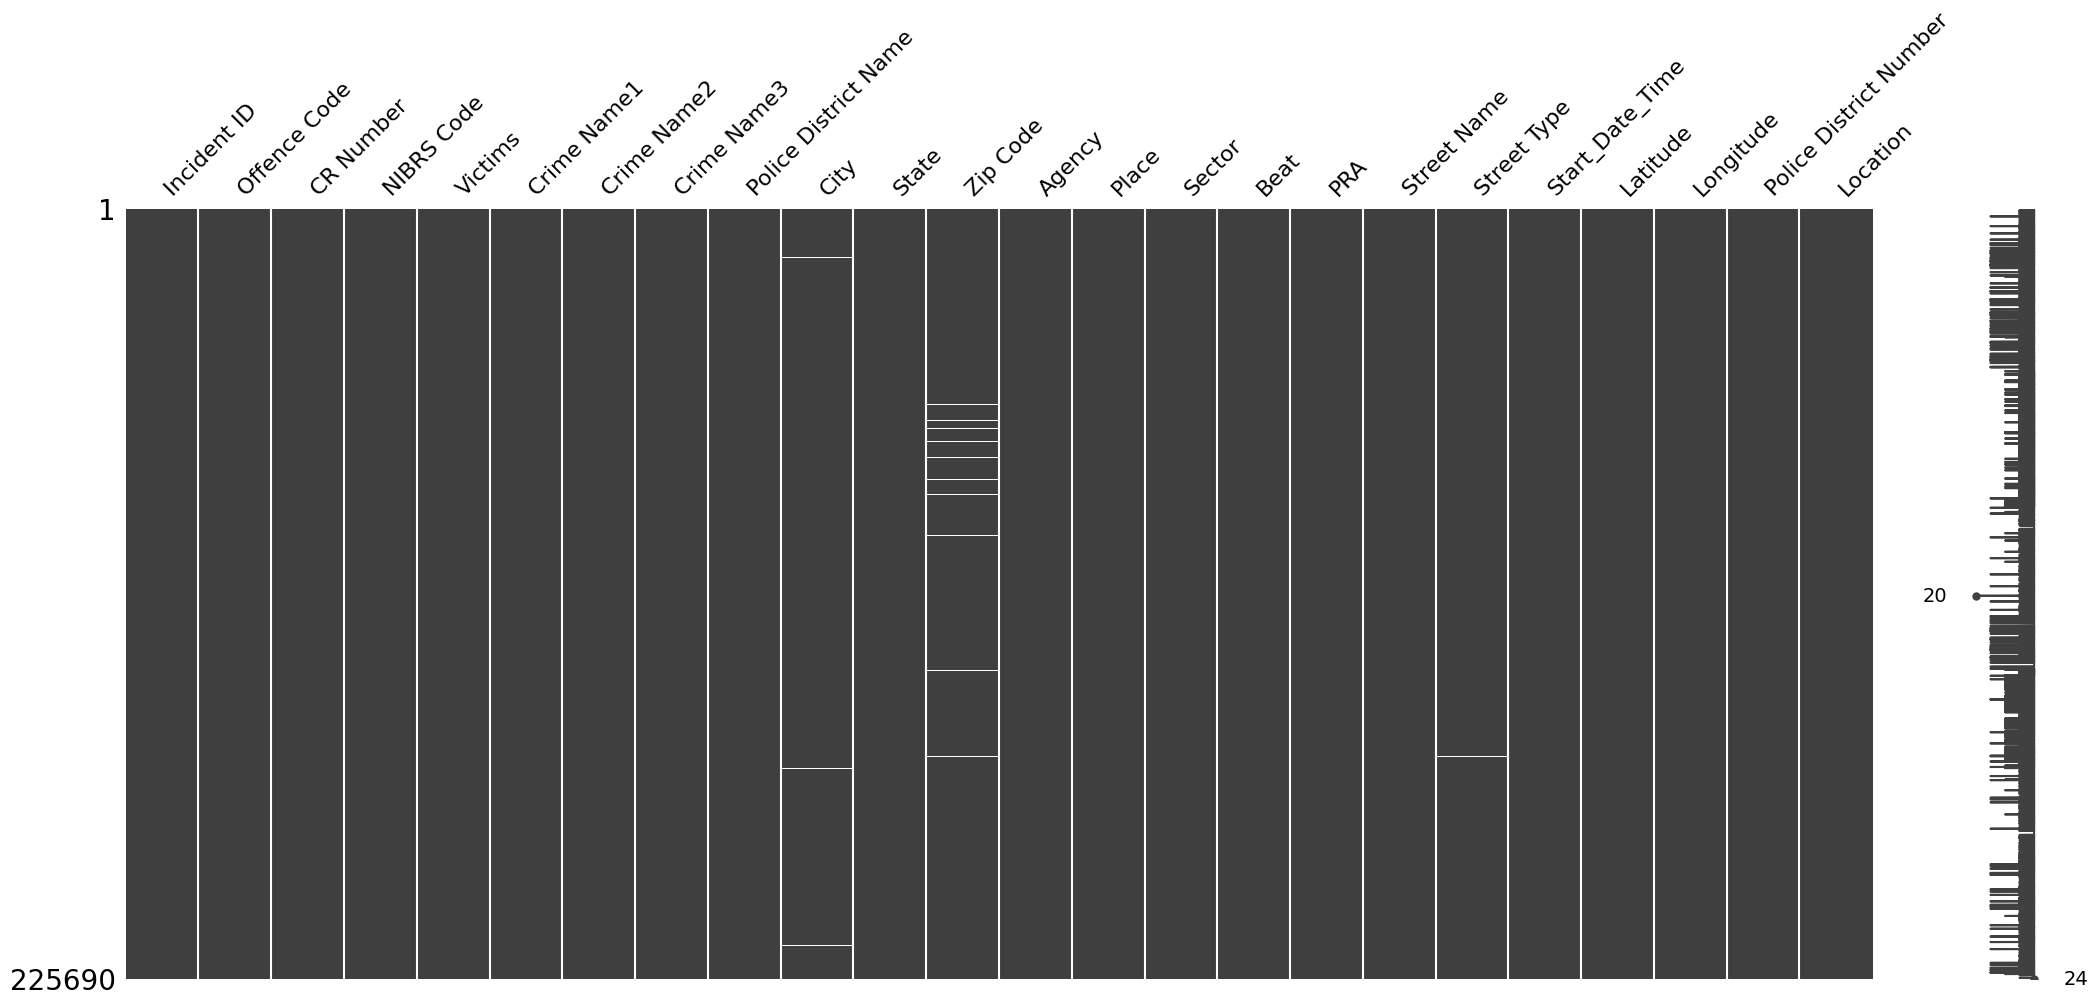

In [9]:
msno.matrix(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             225690 non-null  float64
 1   Offence Code            225690 non-null  object 
 2   CR Number               225690 non-null  float64
 3   NIBRS Code              225690 non-null  object 
 4   Victims                 225690 non-null  float64
 5   Crime Name1             225549 non-null  object 
 6   Crime Name2             225549 non-null  object 
 7   Crime Name3             225549 non-null  object 
 8   Police District Name    225690 non-null  object 
 9   City                    224633 non-null  object 
 10  State                   225690 non-null  object 
 11  Zip Code                222503 non-null  float64
 12  Agency                  225690 non-null  object 
 13  Place                   225690 non-null  object 
 14  Sector              

In [11]:
df['Crime Name1'].value_counts()

Crime Against Property    98217
Crime Against Society     58535
Other                     45164
Crime Against Person      20916
Not a Crime                2717
Name: Crime Name1, dtype: int64

In [12]:
px.pie(values=df['Crime Name1'].value_counts().values, names=df['Crime Name1'].value_counts().index, title="범죄명1 title")

In [13]:
df['Crime Name2'].value_counts()

All Other Offenses                             52181
Drug/Narcotic Violations                       20920
Theft From Motor Vehicle                       19682
Simple Assault                                 14881
Destruction/Damage/Vandalism of Property       13659
Driving Under the Influence                    12056
Shoplifting                                    11554
All other Larceny                              10199
Theft from Building                             8406
Burglary/Breaking and Entering                  6547
Liquor Law Violations                           6263
Identity Theft                                  4444
Disorderly Conduct                              4415
False Pretenses/Swindle/Confidence Game         4267
Motor Vehicle Theft                             4099
Theft of Motor Vehicle Parts or Accessories     3717
Trespass of Real Property                       3303
Credit Card/Automatic Teller Machine Fraud      3113
Aggravated Assault                            

In [14]:
df['Crime Name2'].value_counts()

All Other Offenses                             52181
Drug/Narcotic Violations                       20920
Theft From Motor Vehicle                       19682
Simple Assault                                 14881
Destruction/Damage/Vandalism of Property       13659
Driving Under the Influence                    12056
Shoplifting                                    11554
All other Larceny                              10199
Theft from Building                             8406
Burglary/Breaking and Entering                  6547
Liquor Law Violations                           6263
Identity Theft                                  4444
Disorderly Conduct                              4415
False Pretenses/Swindle/Confidence Game         4267
Motor Vehicle Theft                             4099
Theft of Motor Vehicle Parts or Accessories     3717
Trespass of Real Property                       3303
Credit Card/Automatic Teller Machine Fraud      3113
Aggravated Assault                            

In [15]:
df['Crime Name3'].value_counts()

LARCENY - FROM AUTO                       19682
DRUGS - MARIJUANA - POSSESS               14401
POLICE INFORMATION                        12783
ASSAULT - 2ND DEGREE                      12187
LARCENY - SHOPLIFTING                     11554
                                          ...  
STOLEN PROPERTY - TRANSPORT INTERSTATE        1
WEAPON - ALTERING IDENTIFICATION ON           1
LIQUOR - MANUFACTURE                          1
GAMBLING - DICE GAME                          1
COMM SEX OFF - KEEPING HOUSE ILL FAME         1
Name: Crime Name3, Length: 325, dtype: int64

In [40]:
times = list(df['Start_Date_Time'].values)
month = [int(i.split(' ')[0][0:2]) for i in times]
day = [int(i.split(' ')[0][3:5]) for i in times]
year = [int(i.split(' ')[0][6:]) for i in times]
date = [i.split(' ')[0] for i in times]

weekday = [datetime.datetime(int(year[i]), int(month[i]), int(day[i])).weekday() for i in range(len(times))]

week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
weekdays = [week[i] for i in weekday]

df['Weekday'] = weekdays

hour = [int(i.split(' ')[1].split(':')[0]) for i in times]
for i in range(len(times)):
    if times[i].split(' ')[-1]=='PM' and hour[i]!=12 and hour[i]!=0:
        hour[i] = hour[i]+12 
    elif times[i].split(' ')[-1]=='AM' and hour[i]== 12:
        hour[i]=0

df['Day'] = day   
df['Hour'] = hour
df['Month'] = month
df['Year'] = year
df['Date'] = pd.to_datetime(date)
df = df.sort_values(by='Date')

<AxesSubplot:>

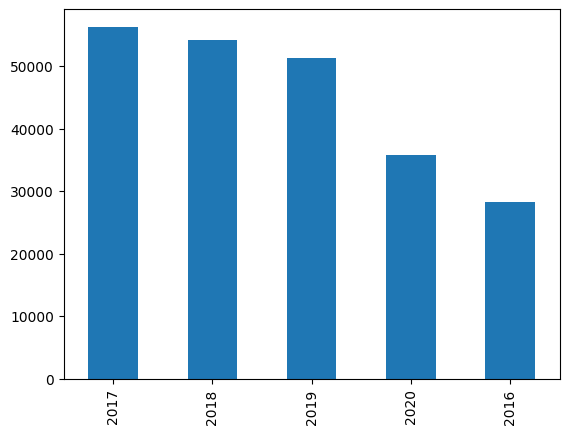

In [21]:
df['Year'].value_counts().plot.bar()

In [32]:
px.bar(x=list(df['Year'].value_counts().index), y=list(df['Year'].value_counts().values), text=list(df['Year'].value_counts().values), title="년도별 범죄 건수"
,color=list(df['Year'].unique()), color_continuous_scale='rainbow')

In [34]:
px.bar(x=list(df['Month'].value_counts().index), y=list(df['Month'].value_counts().values), text=list(df['Month'].value_counts().values), title="전체 월별 범죄 건수"
,color=list(df['Month'].unique()), color_continuous_scale='rainbow')

In [38]:
px.bar(x=list(df['Day'].value_counts().index), y=list(df['Day'].value_counts().values), text=list(df['Day'].value_counts().values), title="전체 일별 범죄 건수"
,color=list(df['Day'].unique()), color_continuous_scale='rainbow')

In [39]:
px.bar(x=list(df['Hour'].value_counts().index), y=list(df['Hour'].value_counts().values), text=list(df['Hour'].value_counts().values), title="전체 시간별 범죄 건수"
,color=list(df['Hour'].unique()), color_continuous_scale='rainbow')

In [45]:
px.bar(x=list(df['Weekday'].value_counts().index), y=list(df['Weekday'].value_counts().values), text=list(df['Weekday'].value_counts().values), title="전체 요일별 범죄 건수"
,color=list(df['Weekday'].unique()), color_continuous_scale='rainbow')

In [48]:
df2016 = df[df['Year'] == 2016]
df2017 = df[df['Year'] == 2017]
df2018 = df[df['Year'] == 2018]
df2019 = df[df['Year'] == 2019]
df2020 = df[df['Year'] == 2020]

In [111]:
def dfyear(year):
       df1 = df[df['Year'] == year]       
       fig = []
       for i in ['Month','Day', 'Hour','Weekday']:
              fig.append(px.bar(x=list(df[i].value_counts().index), y=list(df[i].value_counts().values), text=list(df[i].value_counts().values), title=str(year)+" " + i +'별 범죄 수'
              ,color=list(df[i].unique()), color_continuous_scale='rainbow'))
       return fig

In [115]:
fig = []
for i in [2016, 2017, 2018, 2019, 2020]:
    fig.append(dfyear(i))

for j in fig:
    for k in j:
        k.show()

In [104]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [105]:
lat = df['Latitude'].mean()
lon = df['Longitude'].mean()

In [103]:
tiles_map=folium.Map(location=[lat, lon], zoom_start= 10)

HeatMap(data=df[['Latitude', 'Longitude']],min_opacity=0.4, blur = 18 ,radius=10).add_to(tiles_map)
folium.TileLayer('Stamen Terrain').add_to(tiles_map)
folium.TileLayer('Stamen Toner').add_to(tiles_map)
folium.TileLayer('Stamen Water Color').add_to(tiles_map)
folium.TileLayer('cartodbpositron').add_to(tiles_map)
folium.TileLayer('cartodbdark_matter').add_to(tiles_map)

folium.LayerControl().add_to(tiles_map)

tiles_map